In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
RED = '#E38E39'
BLUE = '#1F509A'
LBLUE = '#d4ebf8'
# pd.set_option('display.max_rows', None)

In [8]:
df = pd.read_csv('/Users/dangthiphuongthao/Documents/MLOps/test_pipeline_diabetes/data/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df_check = df.copy(deep=True)

In [11]:
def check_data(dataframe):
    # Check shape
    print(f"Shape: {dataframe.shape}\n")
    print('-' * 50)
    # Check for duplicates
    print(f"Duplicates: {dataframe.duplicated().sum()}\n")
    print('-' * 50)
    # Check for missing values
    print('Missing value')
    df_temp = dataframe.isnull().sum().reset_index()
    df_temp['% missing'] = df_temp.iloc[:, 1] / len(dataframe) * 100
    print(df_temp)
    print('-' * 50)
    # Describe numeric columns
    if not dataframe.select_dtypes(exclude='object').empty:
        print("Descriptive Statistics for Numeric Columns:\n", dataframe.describe(include=[float, int]), "\n")
        print('-' * 50)
    # Describ   print('-' * 50)e object (categorical) columns
    if not dataframe.select_dtypes(include='object').empty:
        print("Descriptive Statistics for Categorical Columns:\n", dataframe.describe(include=[object]), "\n")
        print('-' * 50)
    # Check data types
    print("Data Types:\n", dataframe.dtypes, "\n")
    print('-' * 50)
    # Check unique values for each column
    unique_counts = dataframe.nunique()
    print("Unique Values Count:\n", unique_counts, "\n")
    print('-' * 50)
    # Values count
    for col in dataframe.columns:
        print(dataframe[col].value_counts().head())
        print('-' * 30)
check_data(df_check)

Shape: (768, 9)

--------------------------------------------------
Duplicates: 0

--------------------------------------------------
Missing value
                      index  0  % missing
0               Pregnancies  0        0.0
1                   Glucose  0        0.0
2             BloodPressure  0        0.0
3             SkinThickness  0        0.0
4                   Insulin  0        0.0
5                       BMI  0        0.0
6  DiabetesPedigreeFunction  0        0.0
7                       Age  0        0.0
8                   Outcome  0        0.0
--------------------------------------------------
Descriptive Statistics for Numeric Columns:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000  

In [12]:
df_check.rename(columns={'Outcome': 'TARGET'}, inplace=True)

/var/folders/87/r431hq3n75l_7nlczx7tq_9c0000gn/T/ipykernel_71295/4113569831.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_check.loc[df_check['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol], color=BLUE)
/var/folders/87/r431hq3n75l_7nlczx7tq_9c0000gn/T/ipykernel_71295/4113569831.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_check.loc[df_check['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol], color=RED)
/var/folders/87/r431hq3n75l_7nlczx7tq_9c0000gn/T/ipykernel_71295/4113569831.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i//ncol, i%ncol].legend()


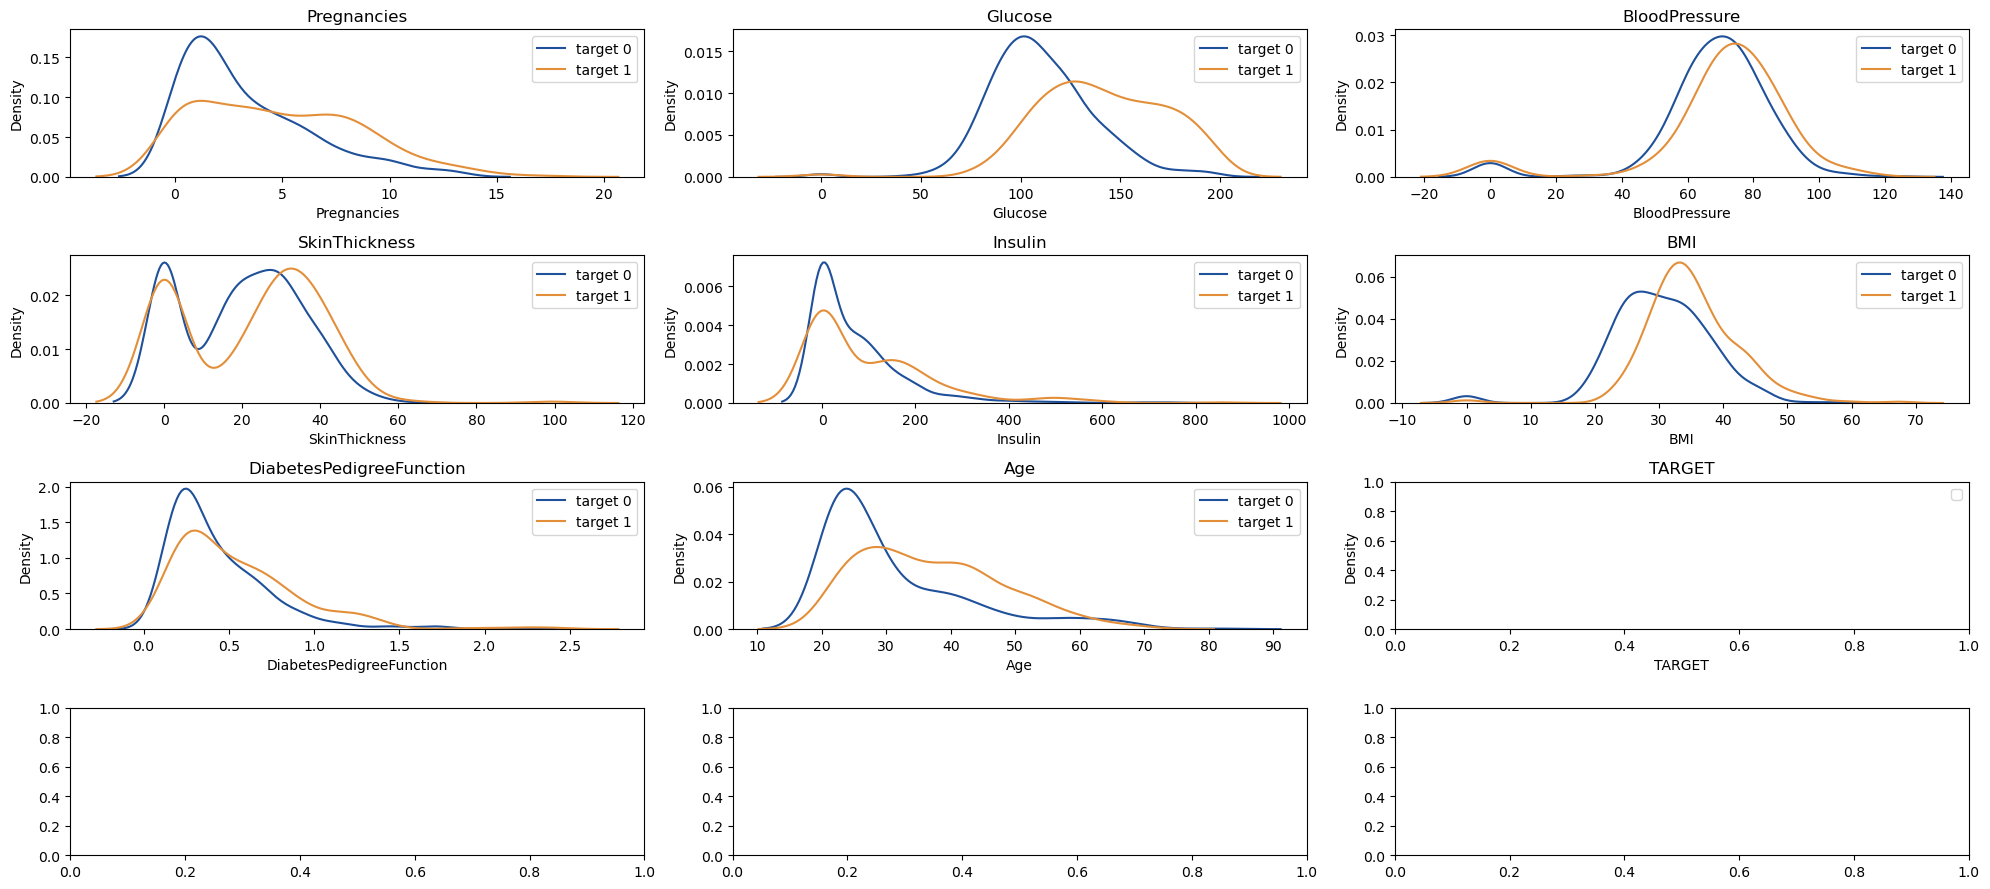

In [13]:
# Plot the distribution of the numerical features with hue = target
cols_to_plot = df_check.select_dtypes('number').columns
ncol, nrow = 3, len(cols_to_plot)//3 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(20, len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(df_check.loc[df_check['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol], color=BLUE)
    sns.kdeplot(df_check.loc[df_check['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol], color=RED)
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

glucose phan tach tot nhat


In [14]:
def detect_outliers_iqr(df):
      outlier_data = []

      for column in df.select_dtypes(include=['number']).columns:
            q1 = df[column].quantile(0.25)  # First quartile
            q3 = df[column].quantile(0.75)  # Third quartile
            iqr = q3 - q1                   # Interquartile range
            
            # Define outlier bounds
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Detect outliers
            outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
            num_outliers = outliers.sum()   # Number of outliers
            perc_outliers = (num_outliers / len(df)) * 100  # Percentage of outliers
            
            outlier_data.append({
            'Column': column,
            'Number of Outliers': num_outliers,
            '% of Outliers': perc_outliers
            })

      return pd.DataFrame(outlier_data)



In [15]:
detect_outliers_iqr(df_check)

,Column,Number of Outliers,% of Outliers
0,Pregnancies,4,0.520833
1,Glucose,5,0.651042
2,BloodPressure,45,5.859375
3,SkinThickness,1,0.130208
4,Insulin,34,4.427083
5,BMI,19,2.473958
6,DiabetesPedigreeFunction,29,3.776042
7,Age,9,1.171875
8,TARGET,0,0.000000


<Axes: xlabel='Outcome'>

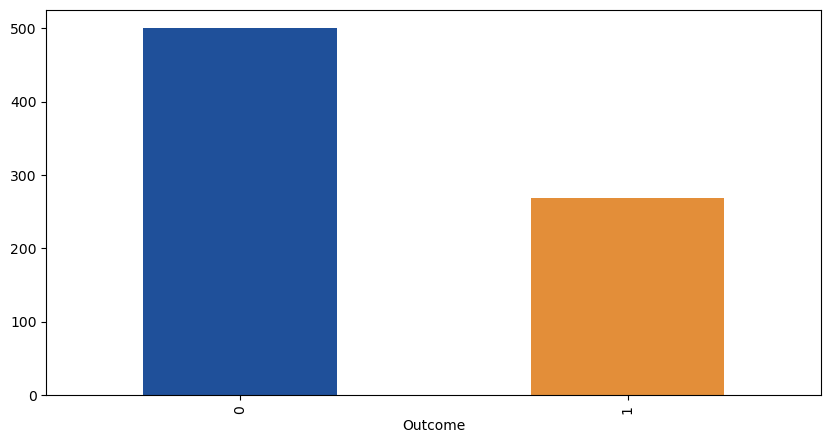

In [16]:
df['Outcome'].value_counts().plot(kind='bar', color=[BLUE, RED], figsize=(10, 5))

In [17]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
# define x, y
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(random_state=42)

# Ensure X and y are defined (from cell 13)
# Fit the LazyClassifier and evaluate
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance of the models
models


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.01
GaussianNB,0.77,0.75,0.75,0.77,0.01
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.02
DecisionTreeClassifier,0.75,0.74,0.74,0.75,0.02
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.01
RidgeClassifier,0.76,0.74,0.74,0.76,0.02
LinearSVC,0.75,0.74,0.74,0.75,0.01
LogisticRegression,0.75,0.74,0.74,0.75,0.01
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.05


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



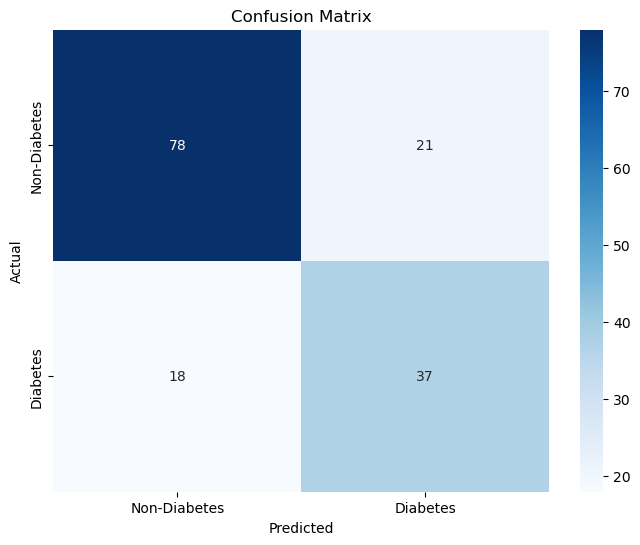

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# Initialize the LogisticRegression model
log_reg = LogisticRegression()

# Fit the model on the downsampled training data
log_reg.fit(X_train, y_train)

# Predict on the original test data
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetes', 'Diabetes'], 
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# import os
# import pickle
# # Save the model to a pickle file in the 'models' directory
# model_directory = './models'
# model_filename = 'logistic_regression_model.pkl'

# # Create the directory if it doesn't exist
# if not os.path.exists(model_directory):
#     os.makedirs(model_directory)

# model_filepath = os.path.join(model_directory, model_filename)

# with open(model_filepath, 'wb') as file:
#     pickle.dump(log_reg, file)

# print(f"Model saved to {model_filepath}")

In [20]:
from catboost import CatBoostClassifier


In [22]:
catboost = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', random_seed=42)
catboost.fit(X_train, y_train)

# Predict on the original test data
y_pred = catboost.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

0:	learn: 0.6380550	total: 75.2ms	remaining: 1m 15s
1:	learn: 0.5952124	total: 78.2ms	remaining: 39s
2:	learn: 0.5572502	total: 80ms	remaining: 26.6s
3:	learn: 0.5312480	total: 82.9ms	remaining: 20.6s
4:	learn: 0.5106153	total: 85.6ms	remaining: 17s
5:	learn: 0.4910576	total: 88.3ms	remaining: 14.6s
6:	learn: 0.4744670	total: 90.9ms	remaining: 12.9s
7:	learn: 0.4654069	total: 93.6ms	remaining: 11.6s
8:	learn: 0.4537830	total: 96.3ms	remaining: 10.6s
9:	learn: 0.4411315	total: 99ms	remaining: 9.8s
10:	learn: 0.4326349	total: 102ms	remaining: 9.14s
11:	learn: 0.4253046	total: 105ms	remaining: 8.62s
12:	learn: 0.4207157	total: 107ms	remaining: 8.16s
13:	learn: 0.4138725	total: 109ms	remaining: 7.7s
14:	learn: 0.4067464	total: 113ms	remaining: 7.42s
15:	learn: 0.3985859	total: 115ms	remaining: 7.07s
16:	learn: 0.3931764	total: 117ms	remaining: 6.76s
17:	learn: 0.3867724	total: 123ms	remaining: 6.71s
18:	learn: 0.3828226	total: 126ms	remaining: 6.48s
19:	learn: 0.3785349	total: 254ms	remain

In [23]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Define the parameter grid
param_grid = {
      'iterations': [500, 1000],
      'depth': [4, 6, 8],
      'learning_rate': [0.01, 0.1, 0.2],
      'l2_leaf_reg': [1, 3, 5],
      'border_count': [32, 64, 128]
}

# Initialize the CatBoostClassifier
catboost = CatBoostClassifier(loss_function='Logloss', random_seed=42, verbose=0)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'border_count': 128, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best Accuracy: 0.7768452096285668


Best Parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy for DecisionTreeClassifier: 0.752415112386418
